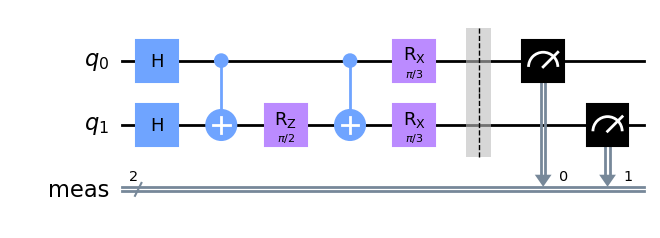

Measurement Results: {'01': 30, '10': 35, '00': 487, '11': 472}


In [1]:
#-------------------------------------------------------------------------
# QAOA Full Circuit
# Chapter 6 in the QUANTUM COMPUTING AND QUANTUM MACHINE LEARNING BOOK
# Code demonstrates applying the phase separation step for two qubits
#-------------------------------------------------------------------------
# Version 1.0
# (c) 2025 Jesse Van Griensven, Roydon Fraser, and Jose Rosas 
# Licence:  MIT - Citation of this work is required
#-------------------------------------------------------------------------
# Qiskit changes frequently. 
# We recommend using the latest version from the book code repository at:
# https://github.com/pedroer/quantum-computing-for-engineers/blob/main/requirements.txt
import warnings
warnings.filterwarnings('ignore')

import numpy as np
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import circuit_drawer

#-------------------------------------------------------------------------
# Define mixing operation
def mixing_layer(qc, beta):
    qc.rx(2 * beta, [0, 1])
    return qc
#-------------------------------------------------------------------------
# Define phase separation
def phase_separation(qc, gamma):
    qc.cx(0, 1)
    qc.rz(2 * gamma, 1)
    qc.cx(0, 1)
#-------------------------------------------------------------------------

def qaoa_circuit(gamma, beta):
    """ Full QAOA circuit """
    # Create the Circuit
    qc = QuantumCircuit(2)
    
    # Initialize Circuit qubits in superposition
    qc.h([0, 1])  
    
    # Prepare Phase Separation Circuit
    phase_separation(qc, gamma)
    
    # Apply mixing layer
    mixing_layer(qc, beta)
    
    qc.measure_all()
    return qc
#-------------------------------------------------------------------------

# Simulate QAOA circuit
gamma = np.pi / 4.
beta  = np.pi / 6

qc = qaoa_circuit(gamma, beta)

# Display the complete circuit
display(circuit_drawer(qc, output='mpl', style="iqp"))

# Execute the circuit
simulator = Aer.get_backend('aer_simulator')
result = execute(qc, simulator).result()

# Output Results
print("Measurement Results:", result.get_counts())
